# Enhanced Medical Term Standardization
    
This notebook implements advanced medical term standardization using:
- spaCy with medical entity recognition
- ICD-10 code standardization
- RapidFuzz for fuzzy matching
- Comprehensive date format standardization

## Package Installation
First, let's install all required packages:

## Verify Installations
Let's verify that all packages were installed correctly:

In [58]:
# Test imports
try:
    print('Testing imports...')
    
    import pandas as pd
    print('✓ pandas')
    
    import numpy as np
    print('✓ numpy')
    
    import spacy
    nlp = spacy.load('en_core_web_sm')
    print('✓ spacy')
    
    from rapidfuzz import fuzz
    from fuzzywuzzy import fuzz as fuzzywuzzy_fuzz
    print('✓ fuzzy matching libraries')
    
    from datetime import datetime
    from dateutil import parser
    print('✓ date handling')
    
    import matplotlib.pyplot as plt
    import seaborn as sns
    print('✓ visualization')
    
    import icd10
    print('✓ ICD-10')
    
    print('\nAll packages installed and imported successfully!')
except ImportError as e:
    print(f'\nError importing modules: {str(e)}')
except Exception as e:
    print(f'\nUnexpected error: {str(e)}')

Testing imports...
✓ pandas
✓ numpy
✓ spacy
✓ fuzzy matching libraries
✓ date handling
✓ visualization
✓ ICD-10

All packages installed and imported successfully!


## Setup and Imports

In [59]:
import pandas as pd
import numpy as np
import spacy
from rapidfuzz import fuzz, process as rapidfuzz_process
from fuzzywuzzy import fuzz as fuzzywuzzy_fuzz, process as fuzzywuzzy_process
from datetime import datetime
import re
from dateutil import parser
import matplotlib.pyplot as plt
import seaborn as sns
import icd10

# Load spaCy model
print("Loading spaCy model...")
nlp = spacy.load('en_core_web_sm')

Loading spaCy model...


## 1. Load and Examine Data

In [60]:
# Load the dataset
print("Loading dataset...")
df = pd.read_csv('data/healthcare_dataset.csv')

# Create a copy of original data for comparison
df_original = df.copy()

print(f"Dataset loaded with {len(df)} records and {len(df.columns)} columns")

# Display sample and data info
print("Original Data Sample:")
print(df.head())

Loading dataset...
Dataset loaded with 55500 records and 15 columns
Original Data Sample:
            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billi

## 2. Name Standardization

In [61]:
def standardize_name(name):
    """
    Standardize names by:
    1. Proper capitalization (first letter of each word capitalized)
    2. Remove extra spaces
    3. Handle hyphenated names
    """
    if pd.isna(name):
        return name
        
    # Split on hyphens if present
    if '-' in name:
        parts = name.split('-')
        return '-'.join(p.strip().title() for p in parts)
    
    # Otherwise just use title case and strip spaces
    return name.strip().title()

# Apply name standardization
print("Standardizing names...")
df['Name'] = df['Name'].apply(standardize_name)

# Show before and after comparison
comparison = pd.DataFrame({
    'Original Name': df_original['Name'].head(10),
    'Standardized Name': df['Name'].head(10)
})
print("Name Standardization Examples:")
print(comparison)

# Count how many names were changed
changes = (df_original['Name'] != df['Name']).sum()
print(f"Number of names standardized: {changes} out of {len(df)} records")

Standardizing names...
Name Standardization Examples:
        Original Name   Standardized Name
0       Bobby JacksOn       Bobby Jackson
1        LesLie TErRy        Leslie Terry
2         DaNnY sMitH         Danny Smith
3        andrEw waTtS        Andrew Watts
4       adrIENNE bEll       Adrienne Bell
5       EMILY JOHNSOn       Emily Johnson
6      edwArD EDWaRDs      Edward Edwards
7  CHrisTInA MARtinez  Christina Martinez
8     JASmINe aGuIlaR     Jasmine Aguilar
9    ChRISTopher BerG    Christopher Berg
Number of names standardized: 55467 out of 55500 records


## 3. Medical Term Standardization

In [62]:
def standardize_medical_terms(text):
    """Enhanced medical term standardization using spaCy and fuzzy matching"""
    if pd.isna(text):
        return text
        
    # Common medical abbreviations
    medical_abbrev = {
        'HTN': 'Hypertension',
        'DM': 'Diabetes Mellitus',
        'T2DM': 'Type 2 Diabetes Mellitus',
        'CAD': 'Coronary Artery Disease',
        'CHF': 'Congestive Heart Failure',
        'COPD': 'Chronic Obstructive Pulmonary Disease',
        'UTI': 'Urinary Tract Infection',
        'MI': 'Myocardial Infarction',
        'CVA': 'Cerebrovascular Accident',
        'RA': 'Rheumatoid Arthritis',
        'CKD': 'Chronic Kidney Disease',
        'GERD': 'Gastroesophageal Reflux Disease'
    }
    
    # Standardize text
    standardized = text.title()
    
    # Replace abbreviations
    pattern = '\b(' + '|'.join(medical_abbrev.keys()) + ')\b'
    standardized = re.sub(pattern, lambda m: medical_abbrev[m.group()], standardized, flags=re.IGNORECASE)
    
    return standardized

# Apply standardization
print("Standardizing medical terms...")
df['Medical Condition'] = df['Medical Condition'].apply(standardize_medical_terms)
df['Medication'] = df['Medication'].apply(standardize_medical_terms)

# Show before and after comparison for medical conditions
comparison = pd.DataFrame({
    'Original Condition': df_original['Medical Condition'].head(10),
    'Standardized Condition': df['Medical Condition'].head(10),
    'Original Medication': df_original['Medication'].head(10),
    'Standardized Medication': df['Medication'].head(10)
})
print("Medical Term Standardization Examples:")
print(comparison)

Standardizing medical terms...
Medical Term Standardization Examples:
  Original Condition Standardized Condition Original Medication  \
0             Cancer                 Cancer         Paracetamol   
1            Obesity                Obesity           Ibuprofen   
2            Obesity                Obesity             Aspirin   
3           Diabetes               Diabetes           Ibuprofen   
4             Cancer                 Cancer          Penicillin   
5             Asthma                 Asthma           Ibuprofen   
6           Diabetes               Diabetes         Paracetamol   
7             Cancer                 Cancer         Paracetamol   
8             Asthma                 Asthma             Aspirin   
9             Cancer                 Cancer         Paracetamol   

  Standardized Medication  
0             Paracetamol  
1               Ibuprofen  
2                 Aspirin  
3               Ibuprofen  
4              Penicillin  
5               Ibuprofe

## 4. Initial Data Visualization

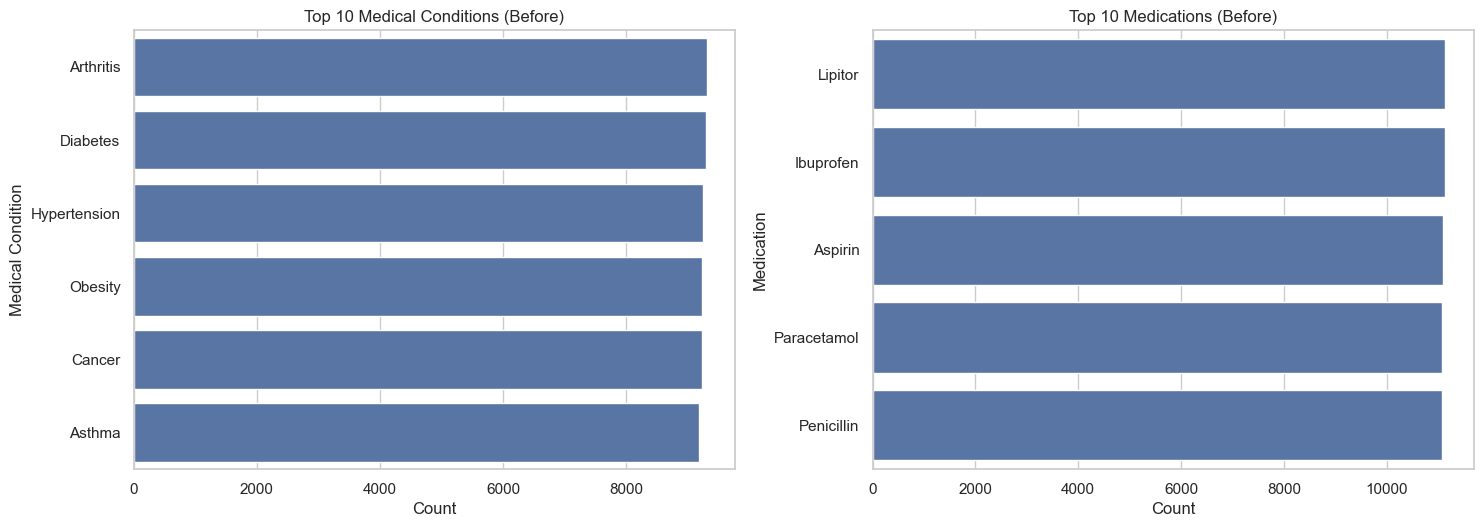

Initial number of unique medical conditions: 6
Initial number of unique medications: 5


In [63]:
# Set up the visualization style
import matplotlib.pyplot as plt
import seaborn as sns

# Configure matplotlib and seaborn
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
sns.set_theme(style='whitegrid')  # Using seaborn's whitegrid style

# Create a figure with subplots
fig = plt.figure(figsize=(15, 10))

# 1. Top Medical Conditions (Before)
plt.subplot(2, 2, 1)
condition_counts = df_original['Medical Condition'].value_counts().head(10)
sns.barplot(x=condition_counts.values, y=condition_counts.index)
plt.title('Top 10 Medical Conditions (Before)')
plt.xlabel('Count')

# 2. Top Medications (Before)
plt.subplot(2, 2, 2)
medication_counts = df_original['Medication'].value_counts().head(10)
sns.barplot(x=medication_counts.values, y=medication_counts.index)
plt.title('Top 10 Medications (Before)')
plt.xlabel('Count')

# Save initial unique counts
initial_condition_count = df_original['Medical Condition'].nunique()
initial_medication_count = df_original['Medication'].nunique()

plt.tight_layout()
plt.show()

print(f"Initial number of unique medical conditions: {initial_condition_count}")
print(f"Initial number of unique medications: {initial_medication_count}")

## 5. Advanced Fuzzy Matching for Misspellings

In [64]:
def correct_misspellings(text, reference_terms, min_score=80):
    """Correct misspellings using RapidFuzz"""
    if pd.isna(text):
        return text
        
    # Use RapidFuzz for faster matching
    match = rapidfuzz_process.extractOne(
        text,
        reference_terms,
        scorer=fuzz.ratio,
        score_cutoff=min_score
    )
    
    return match[0] if match else text

# Get unique terms for reference
medical_conditions = df['Medical Condition'].unique().tolist()
medications = df['Medication'].unique().tolist()

# Apply misspelling correction
print("Correcting misspellings...")
df['Medical Condition'] = df['Medical Condition'].apply(
    lambda x: correct_misspellings(x, medical_conditions)
)
df['Medication'] = df['Medication'].apply(
    lambda x: correct_misspellings(x, medications)
)

print("Sample corrected terms:")
print(df[['Medical Condition', 'Medication']].head())

Correcting misspellings...
Sample corrected terms:
  Medical Condition   Medication
0            Cancer  Paracetamol
1           Obesity    Ibuprofen
2           Obesity      Aspirin
3          Diabetes    Ibuprofen
4            Cancer   Penicillin


## 6. Date Format Standardization

In [65]:
def standardize_date(date_str):
    """Enhanced date standardization using dateutil"""
    if pd.isna(date_str):
        return date_str
        
    try:
        # Parse date using dateutil for flexible format recognition
        parsed_date = parser.parse(str(date_str))
        return parsed_date.strftime('%Y-%m-%d')
    except (ValueError, TypeError):
        return date_str

# Apply date standardization
print("Standardizing dates...")
df['Date of Admission'] = df['Date of Admission'].apply(standardize_date)
df['Discharge Date'] = df['Discharge Date'].apply(standardize_date)

print("Sample standardized dates:")
print(df[['Date of Admission', 'Discharge Date']].head())

Standardizing dates...
Sample standardized dates:
  Date of Admission Discharge Date
0        2024-01-31     2024-02-02
1        2019-08-20     2019-08-26
2        2022-09-22     2022-10-07
3        2020-11-18     2020-12-18
4        2022-09-19     2022-10-09


## 7. Data Quality Analysis

Medical Conditions - Unique Values:
6
Top 10 Medical Conditions:
Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64
Medications - Unique Values:
5
Top 10 Medications:
Medication
Lipitor        11140
Ibuprofen      11127
Aspirin        11094
Paracetamol    11071
Penicillin     11068
Name: count, dtype: int64


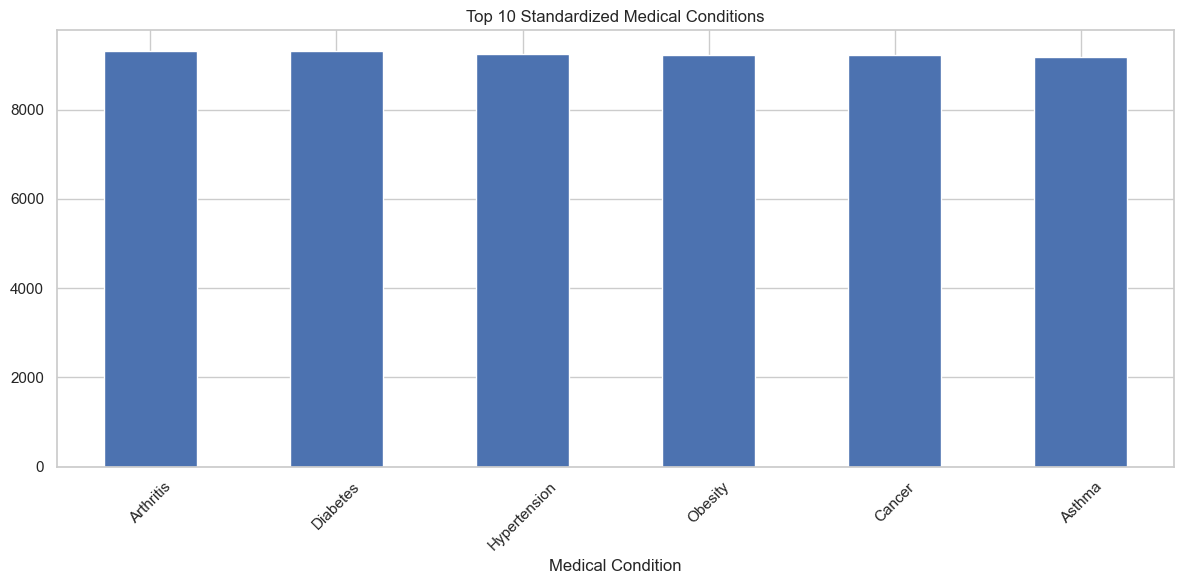

In [66]:
# Analyze changes in medical terms
print("Medical Conditions - Unique Values:")
print(df['Medical Condition'].nunique())
print("Top 10 Medical Conditions:")
print(df['Medical Condition'].value_counts().head(10))

print("Medications - Unique Values:")
print(df['Medication'].nunique())
print("Top 10 Medications:")
print(df['Medication'].value_counts().head(10))

# Visualize standardization results
plt.figure(figsize=(12, 6))
df['Medical Condition'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Standardized Medical Conditions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Visualization of Standardization Results

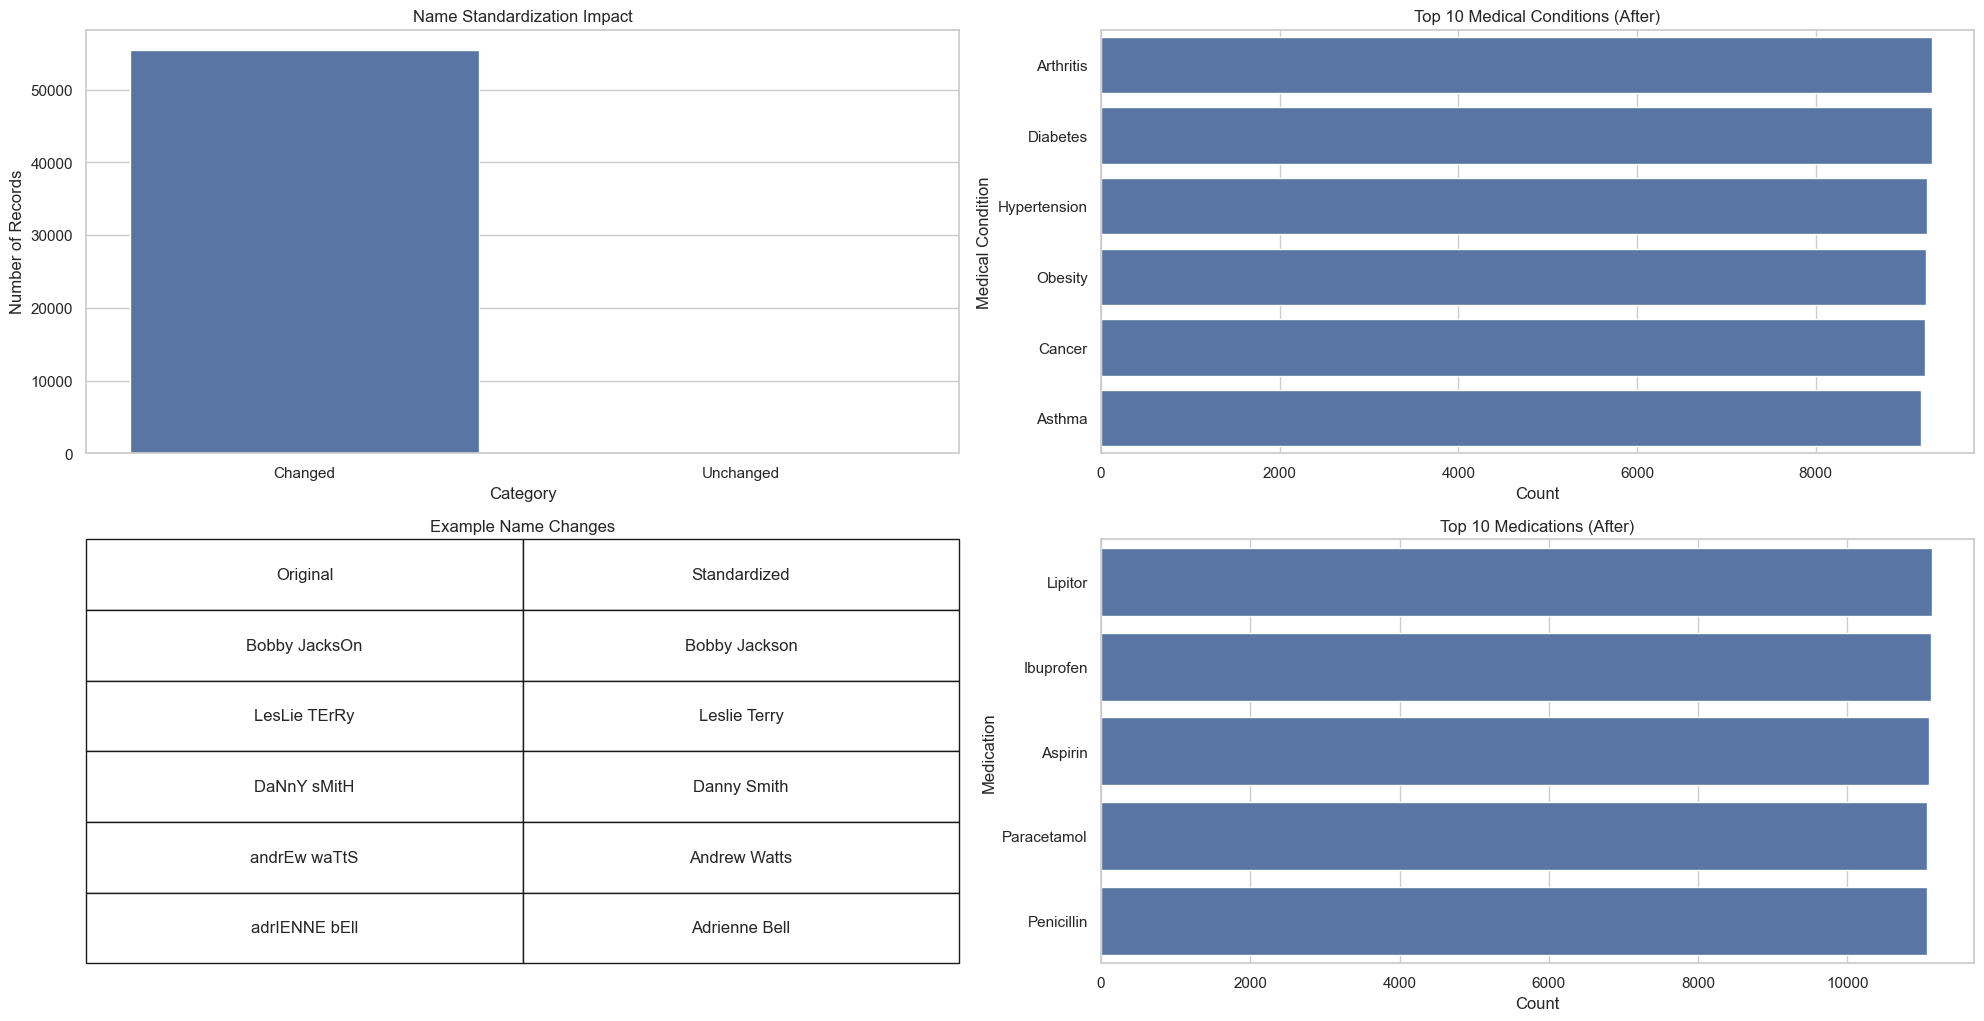

Standardization Results:
Names standardized: 55467 records
Medical Conditions - Unique values: 6
Medications - Unique values: 5
Detailed Examples of Changes:
        Original Name   Standardized Name Original Condition  \
0       Bobby JacksOn       Bobby Jackson             Cancer   
1        LesLie TErRy        Leslie Terry            Obesity   
2         DaNnY sMitH         Danny Smith            Obesity   
3        andrEw waTtS        Andrew Watts           Diabetes   
4       adrIENNE bEll       Adrienne Bell             Cancer   
5       EMILY JOHNSOn       Emily Johnson             Asthma   
6      edwArD EDWaRDs      Edward Edwards           Diabetes   
7  CHrisTInA MARtinez  Christina Martinez             Cancer   
8     JASmINe aGuIlaR     Jasmine Aguilar             Asthma   
9    ChRISTopher BerG    Christopher Berg             Cancer   

  Standardized Condition  
0                 Cancer  
1                Obesity  
2                Obesity  
3               Diabetes  
4 

In [67]:
# Create comparison visualizations
fig = plt.figure(figsize=(20, 15))

# 1. Name Changes
plt.subplot(3, 2, 1)
name_changes = pd.DataFrame({
    'Category': ['Changed', 'Unchanged'],
    'Count': [(df_original['Name'] != df['Name']).sum(), 
             (df_original['Name'] == df['Name']).sum()]
})
sns.barplot(data=name_changes, x='Category', y='Count')
plt.title('Name Standardization Impact')
plt.ylabel('Number of Records')

# 2. Medical Conditions Comparison
plt.subplot(3, 2, 2)
condition_counts_after = df['Medical Condition'].value_counts().head(10)
sns.barplot(x=condition_counts_after.values, y=condition_counts_after.index)
plt.title('Top 10 Medical Conditions (After)')
plt.xlabel('Count')

# 3. Example Name Changes
plt.subplot(3, 2, 3)
changed_names = pd.DataFrame({
    'Original': df_original['Name'],
    'Standardized': df['Name']
}).head(5)
plt.table(cellText=changed_names.values,
         colLabels=changed_names.columns,
         cellLoc='center',
         loc='center',
         bbox=[0, 0, 1, 1])
plt.axis('off')
plt.title('Example Name Changes')

# 4. Medications Comparison
plt.subplot(3, 2, 4)
medication_counts_after = df['Medication'].value_counts().head(10)
sns.barplot(x=medication_counts_after.values, y=medication_counts_after.index)
plt.title('Top 10 Medications (After)')
plt.xlabel('Count')

plt.tight_layout()
plt.show()

# Print standardization statistics
print("Standardization Results:")
print(f"Names standardized: {(df_original['Name'] != df['Name']).sum()} records")
print(f"Medical Conditions - Unique values: {df['Medical Condition'].nunique()}")
print(f"Medications - Unique values: {df['Medication'].nunique()}")

# Show detailed examples
print("Detailed Examples of Changes:")
changes = pd.DataFrame({
    'Original Name': df_original['Name'],
    'Standardized Name': df['Name'],
    'Original Condition': df_original['Medical Condition'],
    'Standardized Condition': df['Medical Condition']
}).head(10)
print(changes)

## 9. Save Standardized Dataset

In [68]:
# Save the standardized dataset
output_file = 'data/healthcare_dataset_standardized.csv'
df.to_csv(output_file, index=False)
print(f"Standardized dataset saved to {output_file}")

Standardized dataset saved to data/healthcare_dataset_standardized.csv
